<a href="https://colab.research.google.com/github/davoodwadi/davoodwadi.github.io/blob/main/Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/davoodwadi/davoodwadi.github.io.git"

fatal: destination path 'davoodwadi.github.io' already exists and is not an empty directory.


In [ ]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
from torch import tensor, nn

In [ ]:
torch.manual_seed(42)

mpl.rcParams['image.cmap'] = 'gray'
torch.set_printoptions(precision=2, linewidth=125, sci_mode=False)
np.set_printoptions(precision=2, linewidth=125)

# Linear Regression and Gradient Descent

In [ ]:
X = torch.randn(100, 1)
y = X * 4 + torch.randn(100, 1)
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
torch.randn(1)

tensor([-0.46])

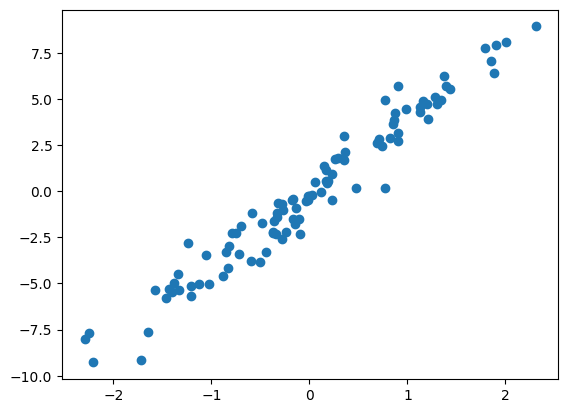

In [ ]:
plt.scatter(X,y)

In [ ]:
Ws = torch.linspace(0,8, 50)
Ws

tensor([0.00, 0.16, 0.33, 0.49, 0.65, 0.82, 0.98, 1.14, 1.31, 1.47, 1.63, 1.80, 1.96, 2.12, 2.29, 2.45, 2.61, 2.78, 2.94,
        3.10, 3.27, 3.43, 3.59, 3.76, 3.92, 4.08, 4.24, 4.41, 4.57, 4.73, 4.90, 5.06, 5.22, 5.39, 5.55, 5.71, 5.88, 6.04,
        6.20, 6.37, 6.53, 6.69, 6.86, 7.02, 7.18, 7.35, 7.51, 7.67, 7.84, 8.00])

In [ ]:
X.shape

torch.Size([100, 1])

In [ ]:
losses = []
for w in Ws:
  y_pred = X*w
  loss = (y-y_pred).pow(2).mean() #mse
  losses.append(loss.item())

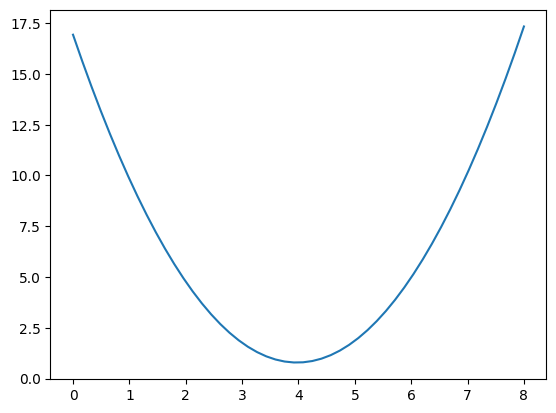

In [ ]:
plt.plot(Ws, losses)

In [ ]:
w = tensor([[1.]], requires_grad=True)
w

tensor([[1.]], requires_grad=True)

In [ ]:
y_hat = X @ w

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
loss = loss_fn(y_hat, y)
loss

tensor(9.83, grad_fn=<MseLossBackward0>)

In [ ]:
loss.backward()

In [ ]:
w.grad

tensor([[-6.08]])

In [ ]:
w.data.grad = None
w

tensor([[1.]], requires_grad=True)

gradient descent step

tensor([[1.]], requires_grad=True)

In [ ]:
lr = 0.01
with torch.no_grad():
  w = w - w.grad * lr
w

tensor([[1.06]])

In [ ]:
w = tensor([[1.]], requires_grad=True)
w

tensor([[1.]], requires_grad=True)

In [ ]:
for iteration in range(1000):
  w.data.grad = 0.
  y_hat = X @ w
  loss = loss_fn(y_hat, y)
  loss.backward()
  with torch.no_grad():
    w.data = w.data - w.data.grad * lr
  print(f'loss`: {loss:.2f}, w: {w}')




TypeError: ignored

In [ ]:
w = tensor([[1.]], requires_grad=True)
optimizer = torch.optim.SGD([w], lr = lr)

In [ ]:
for iteration in range(1000):
  y_hat = X @ w
  loss = loss_fn(y_hat, y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  print(f'loss`: {loss:.2f}, w: {w}')


loss`: 9.83, w: tensor([[1.06]], requires_grad=True)
loss`: 9.47, w: tensor([[1.12]], requires_grad=True)
loss`: 9.11, w: tensor([[1.18]], requires_grad=True)
loss`: 8.78, w: tensor([[1.24]], requires_grad=True)
loss`: 8.46, w: tensor([[1.29]], requires_grad=True)
loss`: 8.15, w: tensor([[1.35]], requires_grad=True)
loss`: 7.85, w: tensor([[1.40]], requires_grad=True)
loss`: 7.56, w: tensor([[1.45]], requires_grad=True)
loss`: 7.29, w: tensor([[1.50]], requires_grad=True)
loss`: 7.03, w: tensor([[1.55]], requires_grad=True)
loss`: 6.77, w: tensor([[1.60]], requires_grad=True)
loss`: 6.53, w: tensor([[1.65]], requires_grad=True)
loss`: 6.30, w: tensor([[1.70]], requires_grad=True)
loss`: 6.08, w: tensor([[1.75]], requires_grad=True)
loss`: 5.86, w: tensor([[1.79]], requires_grad=True)
loss`: 5.66, w: tensor([[1.84]], requires_grad=True)
loss`: 5.46, w: tensor([[1.88]], requires_grad=True)
loss`: 5.27, w: tensor([[1.92]], requires_grad=True)
loss`: 5.09, w: tensor([[1.97]], requires_grad

# MNIST dataset

In [ ]:
path_data = Path('./davoodwadi.github.io/data/')
path_gz = path_data/'mnist.pkl.gz'
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
x_train, y_train, x_valid, y_valid = map(tensor, [x_train, y_train, x_valid, y_valid])

In [ ]:
x_train.shape

torch.Size([50000, 784])

In [ ]:
# x_binary = x_train[(y_train==0) | (y_train==1)]
# y_binary = y_train[(y_train==0) | (y_train==1)]

In [ ]:
y_train[0]

tensor(5)

Text(0.5, 1.0, '5')

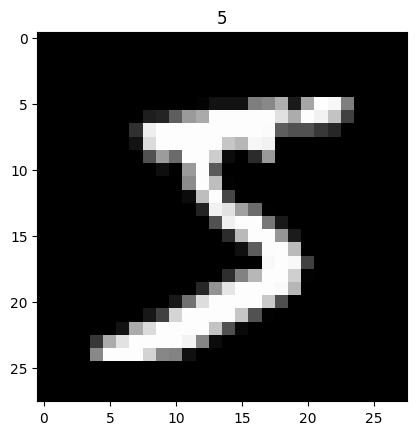

In [ ]:
i=0
plt.imshow(x_train[i].view(28,28))
plt.title(y_train[i].item())

# MSE loss for classification

In [ ]:
mse_loss = torch.nn.MSELoss()
inp = tensor([[.9,0.1]])
tarOnehot = tensor([[0, 1]])
mse_loss(inp, tarOnehot)

tensor(0.81)

In [ ]:
mse_loss = torch.nn.MSELoss()
inp = tensor([[.5,0.1, 0.1, 0.1, 0.1, 0., 0., 0., 0., 0.1 ]])
tarOnehot = tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])
mse_loss(inp, tarOnehot)

tensor(0.11)

## CrossEntropy loss

In [ ]:
ce_loss = torch.nn.CrossEntropyLoss()
inp = tensor([[.9,0.1]])
logInp = inp.log()
print(logInp)
tar = tensor([1])

ce_loss(logInp, tar).item()

tensor([[-0.11, -2.30]])


2.3025851249694824

In [ ]:
p = tensor(0.1)
(-1) * (tar * p.log() + (1-tar) * (1-p).log())

tensor([2.30])

## 10 classes

In [ ]:
ce_loss = torch.nn.CrossEntropyLoss()
inp = tensor([[.5,0.1, 0.1, 0.1, 0.1, 0., 0., 0., 0., 0.1 ]])
logInp = inp.log()
print(logInp)
tar = tensor([1])
print(inp.shape, tar.shape)
ce_loss(logInp, tar).item()

tensor([[-0.69, -2.30, -2.30, -2.30, -2.30,  -inf,  -inf,  -inf,  -inf, -2.30]])
torch.Size([1, 10]) torch.Size([1])


2.3025851249694824

In [ ]:
p = tensor(0.1)
(-1) * (tar * p.log())

tensor([2.30])

# Datasets and dataloaders

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class dataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

In [ ]:
data_train = dataset(x_train, y_train)

In [ ]:
x, y = data_train[0]

In [ ]:
x.shape

torch.Size([784])

In [ ]:
y

tensor(5)

In [ ]:
train_dataset = ...
valid_dataset = ...

In [ ]:
train_loader = DataLoader(data_train, batch_size=64, shuffle=True, drop_last=True)
# valid_loader = DataLoader(x_valid, batch_size=64, shuffle=False)

In [ ]:
for xs, ys in train_loader:
  print(xs.shape)

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size

# Training loop

In [ ]:
w

tensor([[3.98]], requires_grad=True)

In [ ]:
class FCModel(nn.Module):
  def __init__(self, feature_size, hidden_size):
    super(FCModel, self).__init__()

    self.fc1 = nn.Linear(feature_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, 10)
    self.relu = nn.ReLU()
  def forward(self, x):
    out1 = self.fc(x)
    out2 = self.relu(out1)
    out3 = self.classification(out2)
    return out3

In [ ]:
x_train.shape

torch.Size([50000, 784])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
y_train_dummy = encoder.fit_transform(y_train.view(-1,1)).toarray()
y_train_dummy = tensor(y_train_dummy).float()
y_train_dummy.shape

torch.Size([50000, 10])

In [ ]:
hidden_size = 256
lr = 0.01
model = FCModel(x_train.shape[1], 256)
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [ ]:
model.fc.weight.shape

torch.Size([256, 784])

In [ ]:
model.fc.bias.shape

torch.Size([256])

In [ ]:
model.classification.weight.shape

torch.Size([10, 256])

In [ ]:
epoch = 10
for e in range(epoch):
  output = model(x_train)
  loss = mse_loss(output, y_train_dummy)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  predictions = output.argmax(-1)
  accuracy = (predictions==y_train).float().mean()
  print(f'epoch {e}; loss {loss.item():.4f}; accuracy {accuracy:.2f}')

epoch 0; loss 0.1172; accuracy 0.06
epoch 1; loss 0.1165; accuracy 0.06
epoch 2; loss 0.1158; accuracy 0.06
epoch 3; loss 0.1151; accuracy 0.07
epoch 4; loss 0.1144; accuracy 0.07
epoch 5; loss 0.1138; accuracy 0.07
epoch 6; loss 0.1132; accuracy 0.07
epoch 7; loss 0.1126; accuracy 0.07
epoch 8; loss 0.1120; accuracy 0.07
epoch 9; loss 0.1114; accuracy 0.08


In [ ]:
output[0], y_train[0]

(tensor([ 0.08,  0.08, -0.05, -0.11,  0.18, -0.02, -0.04,  0.25, -0.15,  0.04], grad_fn=<SelectBackward0>),
 tensor(5))

In [ ]:
hidden_size = 256
lr = 0.01
model = FCModel(x_train.shape[1], 256)
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [ ]:
for e in range(epoch):
  output = model(x_train)
  loss = ce_loss(output, y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  predictions = output.argmax(-1)
  accuracy = (predictions==y_train).float().mean()
  print(f'epoch {e}; loss {loss.item():.4f}; accuracy {accuracy:.2f}')

epoch 0; loss 2.2971; accuracy 0.11
epoch 1; loss 2.2951; accuracy 0.11
epoch 2; loss 2.2932; accuracy 0.11
epoch 3; loss 2.2912; accuracy 0.11
epoch 4; loss 2.2893; accuracy 0.12
epoch 5; loss 2.2873; accuracy 0.12
epoch 6; loss 2.2854; accuracy 0.12
epoch 7; loss 2.2835; accuracy 0.12
epoch 8; loss 2.2815; accuracy 0.13
epoch 9; loss 2.2796; accuracy 0.13


In [ ]:
output[0], y_train[0]

(tensor([-0.00, -0.08,  0.01, -0.07, -0.19, -0.01,  0.04,  0.07,  0.01, -0.09], grad_fn=<SelectBackward0>),
 tensor(5))